## HOUSE PRICE PREDICTION

In [1]:
##importing the required libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##Loading the train,test file and submission file

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


## EXPLORATORY DATA ANALYSIS

## 1) Checking missing values

In [5]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
test.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

# 2) Converting the categorial feature into numerical feature

In [7]:
train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [9]:
train['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [10]:
dummies_train = pd.get_dummies(train['POSTED_BY'])

In [11]:
dummies_train.head()

,Builder,Dealer,Owner
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [12]:
train = pd.concat([train,dummies_train],axis=1)

In [13]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Builder,Dealer,Owner
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0


In [14]:
## dropping posted_by feature

train.drop('POSTED_BY',axis=1,inplace= True)

In [15]:
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Builder,Dealer,Owner
0,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1
1,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0
2,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1
3,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1
4,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0


In [16]:
train['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [17]:
dummies_train1 = pd.get_dummies(train['BHK_OR_RK'])

In [18]:
dummies_train1.head()

,BHK,RK
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [19]:
train = pd.concat([train,dummies_train1],axis=1)

In [20]:
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Builder,Dealer,Owner,BHK,RK
0,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1,1,0
1,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0,1,0
2,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1,1,0
3,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1,1,0
4,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0,1,0


In [21]:
## dropping BHK_OR_RK feature

train.drop('BHK_OR_RK',axis=1,inplace= True)

In [22]:
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Builder,Dealer,Owner,BHK,RK
0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1,1,0
1,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0,1,0
2,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1,1,0
3,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1,1,0
4,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0,1,0


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29451 non-null  int64  
 1   RERA                   29451 non-null  int64  
 2   BHK_NO.                29451 non-null  int64  
 3   SQUARE_FT              29451 non-null  float64
 4   READY_TO_MOVE          29451 non-null  int64  
 5   RESALE                 29451 non-null  int64  
 6   ADDRESS                29451 non-null  object 
 7   LONGITUDE              29451 non-null  float64
 8   LATITUDE               29451 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
 10  Builder                29451 non-null  uint8  
 11  Dealer                 29451 non-null  uint8  
 12  Owner                  29451 non-null  uint8  
 13  BHK                    29451 non-null  uint8  
 14  RK                     29451 non-null  uint8  
dtypes:

In [24]:
## Repeat the coversion steps in test file as well

test['POSTED_BY'].value_counts()

Dealer     42437
Owner      24920
Builder     1363
Name: POSTED_BY, dtype: int64

In [25]:
dummies_test = pd.get_dummies(test['POSTED_BY'])

In [26]:
dummies_test.head()

,Builder,Dealer,Owner
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [27]:
test = pd.concat([test,dummies_test],axis=1)

In [28]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,Builder,Dealer,Owner
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,0,0,1
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,0,1,0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,0,1,0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,0,1,0
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,0,0,1


In [29]:
## dropping posted_by feature

test.drop('POSTED_BY',axis=1,inplace= True)

In [30]:
test.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,Builder,Dealer,Owner
0,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,0,0,1
1,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,0,1,0
2,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,0,1,0
3,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,0,1,0
4,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,0,0,1


In [31]:
test['BHK_OR_RK'].value_counts()

BHK    68662
RK        58
Name: BHK_OR_RK, dtype: int64

In [32]:
dummies_test1 = pd.get_dummies(test['BHK_OR_RK'])

In [33]:
dummies_test1.head()

,BHK,RK
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [34]:
test = pd.concat([test,dummies_test1],axis=1)

In [35]:
test.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,Builder,Dealer,Owner,BHK,RK
0,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,0,0,1,1,0
1,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,0,1,0,1,0
2,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,0,1,0,1,0
3,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,0,1,0,1,0
4,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,0,0,1,1,0


In [36]:
## Dropping BHK_OR_RK feature

test.drop('BHK_OR_RK',axis=1,inplace= True)

In [37]:
test.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,Builder,Dealer,Owner,BHK,RK
0,0,0,1,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,0,0,1,1,0
1,1,1,2,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,0,1,0,1,0
2,0,0,2,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,0,1,0,1,0
3,0,0,3,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,0,1,0,1,0
4,0,0,1,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,0,0,1,1,0


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UNDER_CONSTRUCTION  68720 non-null  int64  
 1   RERA                68720 non-null  int64  
 2   BHK_NO.             68720 non-null  int64  
 3   SQUARE_FT           68720 non-null  float64
 4   READY_TO_MOVE       68720 non-null  int64  
 5   RESALE              68720 non-null  int64  
 6   ADDRESS             68720 non-null  object 
 7   LONGITUDE           68720 non-null  float64
 8   LATITUDE            68720 non-null  float64
 9   Builder             68720 non-null  uint8  
 10  Dealer              68720 non-null  uint8  
 11  Owner               68720 non-null  uint8  
 12  BHK                 68720 non-null  uint8  
 13  RK                  68720 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(5)
memory usage: 5.0+ MB


In [39]:
## Taking only city names from address feature

train['city']=train['ADDRESS'].str.split(',').str[1]

In [40]:
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Builder,Dealer,Owner,BHK,RK,city
0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1,1,0,Bangalore
1,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0,1,0,Mysore
2,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1,1,0,Bangalore
3,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0,0,1,1,0,Ghaziabad
4,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0,1,0,1,0,Kolkata


In [41]:
train.drop('ADDRESS',axis=1,inplace= True)

In [42]:
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Builder,Dealer,Owner,BHK,RK,city
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1,1,0,Bangalore
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0,1,0,Mysore
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,0,1,1,0,Bangalore
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,0,1,1,0,Ghaziabad
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,1,0,1,0,Kolkata


In [43]:
test['city']=test['ADDRESS'].str.split(',').str[1]

In [44]:
test.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,Builder,Dealer,Owner,BHK,RK,city
0,0,0,1,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,0,0,1,1,0,Surat
1,1,1,2,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,0,1,0,1,0,Lalitpur
2,0,0,2,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,0,1,0,1,0,Kolkata
3,0,0,3,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,0,1,0,1,0,Jaipur
4,0,0,1,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,0,0,1,1,0,Nadiad


In [45]:
test.drop('ADDRESS',axis=1,inplace= True)

In [46]:
test.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Builder,Dealer,Owner,BHK,RK,city
0,0,0,1,545.171340,1,1,21.262000,73.047700,0,0,1,1,0,Surat
1,1,1,2,800.000000,0,0,18.966114,73.148278,0,1,0,1,0,Lalitpur
2,0,0,2,1257.096513,1,1,22.592200,88.484911,0,1,0,1,0,Kolkata
3,0,0,3,1400.329489,1,1,26.988300,75.584600,0,1,0,1,0,Jaipur
4,0,0,1,430.477830,1,1,22.700000,72.870000,0,0,1,1,0,Nadiad


# 3)Finding correlation between features

In [47]:
train.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Builder,Dealer,Owner,BHK,RK
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399,0.187078,0.168987,-0.227133,-0.020719,0.020719
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636,0.112204,0.236575,-0.273075,-0.006056,0.006056
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283,-0.024445,0.091470,-0.085238,0.045231,-0.045231
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685,-0.001216,-0.005032,0.005457,0.000292,-0.000292
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399,-0.187078,-0.168987,0.227133,0.020719,-0.020719
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378,-0.529050,-0.039368,0.198531,0.029346,-0.029346
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112,-0.032542,0.071516,-0.062615,-0.009095,0.009095
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254,-0.001221,-0.026285,0.026967,-0.000303,0.000303
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000,0.022989,0.085513,-0.093437,0.004429,-0.004429
Builder,0.187078,0.112204,-0.024445,-0.001216,-0.187078,-0.529050,-0.032542,-0.001221,0.022989,1.000000,-0.188047,-0.109643,-0.037184,0.037184


<AxesSubplot:>

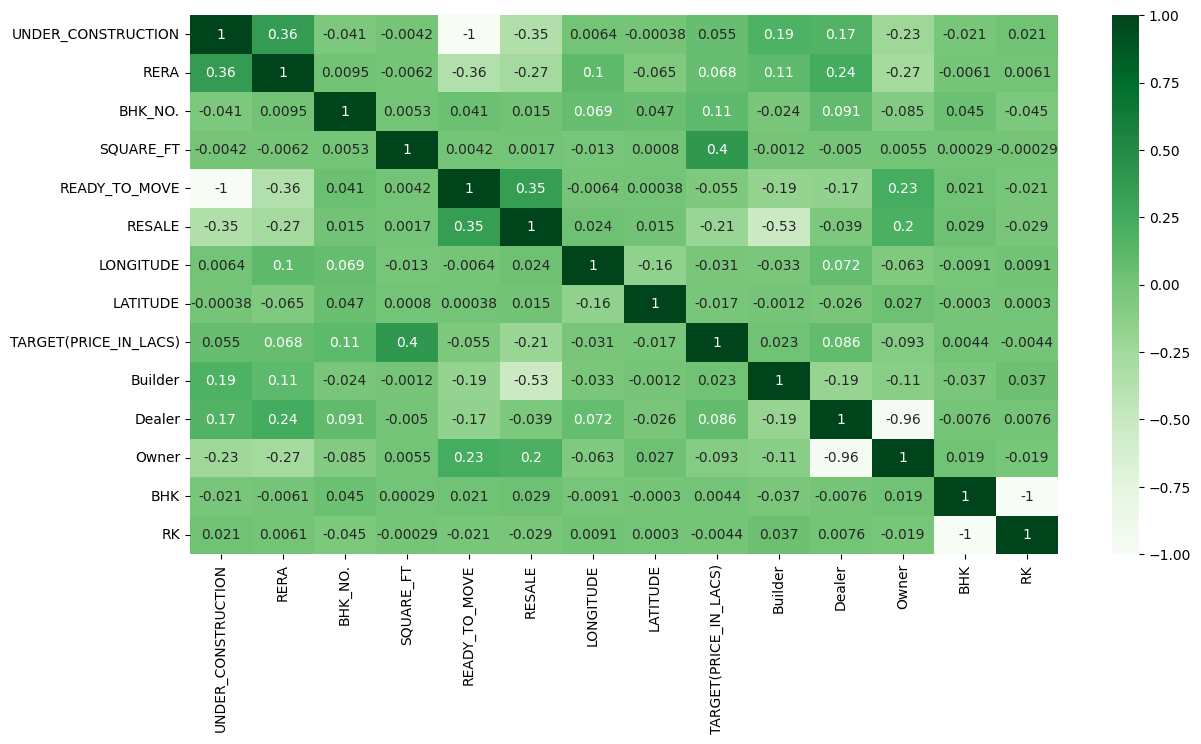

In [48]:
plt.figure(figsize=(14,7))
corr_data = train.corr()
sns.heatmap(corr_data, annot= True, cmap="Greens")

# Feature selection

In [49]:
train.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'Builder',
       'Dealer', 'Owner', 'BHK', 'RK', 'city'],
      dtype='object')

In [50]:
x = train.drop(['TARGET(PRICE_IN_LACS)', 'city'], axis=1)
y = train['TARGET(PRICE_IN_LACS)']

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [52]:
print(model.feature_importances_)

[1.49472058e-03 2.29775637e-03 2.14731262e-02 8.77783546e-01
 1.23925100e-03 4.65389303e-02 2.23899296e-02 2.25879505e-02
 1.52815977e-04 3.50294497e-03 5.38367549e-04 3.23695692e-07
 3.37224526e-07]


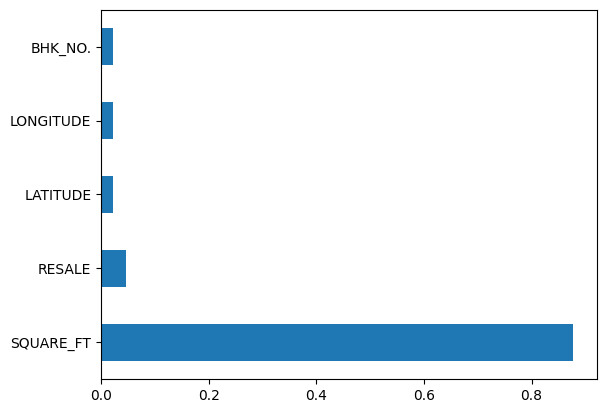

In [53]:
## plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [54]:
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Builder,Dealer,Owner,BHK,RK,city
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1,1,0,Bangalore
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0,1,0,Mysore
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,0,1,1,0,Bangalore
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,0,1,1,0,Ghaziabad
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,1,0,1,0,Kolkata


In [55]:
x = train.drop(['UNDER_CONSTRUCTION','RERA','READY_TO_MOVE', 'Builder', 'Dealer', 'Owner','TARGET(PRICE_IN_LACS)', 'city'], axis=1)

In [56]:
x.head()

,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,BHK,RK
0,2,1300.236407,1,12.969910,77.597960,1,0
1,2,1275.000000,1,12.274538,76.644605,1,0
2,2,933.159722,1,12.778033,77.632191,1,0
3,2,929.921143,1,28.642300,77.344500,1,0
4,2,999.009247,1,22.592200,88.484911,1,0


In [57]:
y.head()

0    55.0
1    51.0
2    43.0
3    62.5
4    60.5
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [58]:
x_test = test.drop(['UNDER_CONSTRUCTION','RERA','READY_TO_MOVE', 'Builder', 'Dealer', 'Owner', 'city'], axis=1)

In [59]:
x_test.head()

,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,BHK,RK
0,1,545.171340,1,21.262000,73.047700,1,0
1,2,800.000000,0,18.966114,73.148278,1,0
2,2,1257.096513,1,22.592200,88.484911,1,0
3,3,1400.329489,1,26.988300,75.584600,1,0
4,1,430.477830,1,22.700000,72.870000,1,0


# Creating a model using Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
regressor=RandomForestRegressor()

In [62]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [65]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()


In [67]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [68]:
rf_random.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [81]:
predictions=rf_random.predict(x)

In [82]:
predictions_test=rf_random.predict(x_test)

In [86]:
submission['TARGET(PRICE_IN_LACS)']=predictions_test

In [87]:
score = r2_score(y, predictions)
print("The accuracy of the model is {}%".format(round(score, 2) *100))

The accuracy of the model is 99.0%


In [88]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

# close the file
file.close()